In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
#each point is lenght, width, color
data= [[3 , 1.5,1],
       [2 , 1 , 0],
       [4 , 1.5,1],
       [3 , 1 , 0],
       [3.5,0.5,1],
       [2 ,0.5 ,0],
       [5.5,1 , 1],
       [1 ,1 , 0]]
mystery_flower= [4.5,1]

In [79]:
#network
# 2 weights, w1,w2, adn a bias b
# input lenght and width, output color
w1= np.random.randn()
w2= np.random.randn()
b= np.random.randn()

In [25]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))
def sigmoid_deriv(x):
    return sigmoid(x)* (1-sigmoid(x))

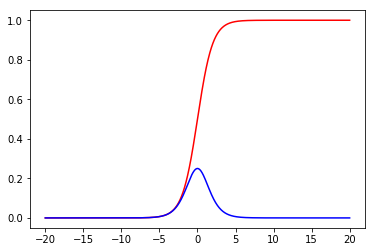

In [13]:
T= np.linspace(-20,20,1000)
plt.plot(T,sigmoid(T),c='r')
plt.plot(T,sigmoid_deriv='b')


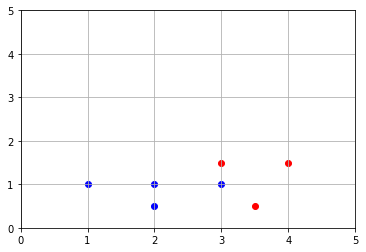

In [22]:
#scatter data
plt.axis([0,5,0,5])
plt.grid()
for i in range(len(data)):
    point = data[i]
    color='r'
    if point[2]==0:
        color='b'
    plt.scatter(point[0],point[1],c=color)

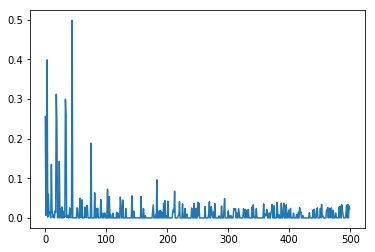

In [80]:
#training loop

learning_rate=0.5
costs= []
for i in range(50000):
    ri=np.random.randint(len(data))
    point= data[ri]
    
    z=point[0]*w1+point[1]*w2+b
    pred=sigmoid(z)
    
    target=point[2]
    cost=np.square(pred-target)
        
    dcost_pred=2*(pred-target)
    dpred_dz= sigmoid_deriv(z)
    dz_dw1=point[0]
    dz_dw2=point[1]
    dz_db=1
    
    dcost_dz=dcost_pred*dpred_dz
    
    dcost_dw1= dcost_dz* dz_dw1
    dcost_dw2=dcost_dz* dz_dw2
    dcost_db=dcost_dz*dz_db
    
    w1=w1-learning_rate*dcost_dw1
    w2=w2-learning_rate*dcost_dw2
    b=b-learning_rate*dcost_db
    
    if i%100==0:
        cost_sum=0
        for j in range(len(data)):
            point=data[ri]
            z=point[0]*w1+point[1]*w2+b
            pred=sigmoid(z)
            target=point[2]
            cost_sum += np.square(pred-target)
        costs.append(cost_sum/len(data))
    
plt.plot(costs)

pred: 0.8347598172680415
pred: 3.38249045444156e-06
pred: 0.9999979245193484
pred: 0.2439169970165055
pred: 0.8641735394736618
pred: 2.1600543344189853e-07
pred: 0.9999999999988967
pred: 3.546528937913827e-11
mystery flower=0.9999905065612472


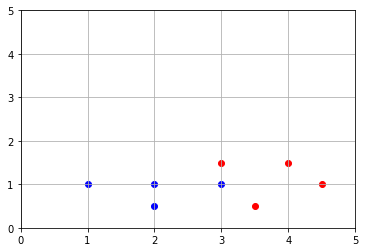

In [94]:
plt.axis([0,5,0,5])
plt.grid()

for i in range(len(data)):
    point=data[i]
    z=point[0]*w1+point[1]*w2+b
    color='r'
    if point[2]<=0.5:
        color='b'
    pred=sigmoid(z)
    print("pred: {}".format(pred))
    plt.scatter(point[0],point[1],c=color)    
    
z=mystery_flower[0]*w1+mystery_flower[1]+b
pred=sigmoid(z)
color='r'
if pred<=0.5:
        color='b'
plt.scatter(mystery_flower[0],mystery_flower[1],c=color)
print("mystery flower={}".format(pred))